# Introduction

This is a step by step approach to the Predictive Insights competition.

Youth unemployment and under-employment is a major concern for any developing country, and serves as an important predictor of economic health and prosperity. Being able to predict and understand employment levels in a country helps promote evidence-based decision-making, supports economic empowerment.

The objective of this challenge is to build a machine learning model that predicts youth employment, based on data from labour market surveys in South Africa.

This solution will help organisations like Predictive Insights achieve a baseline prediction of young peoples’ employment outcomes, allowing them to design and test interventions to help youth make a transition into the labour market or to improve their earnings.

# The Data

The data for this challenge comes from four rounds of a survey of youth in the South African labour market, conducted at 6-month intervals. The survey contains numerical, categorical and free-form text responses. You will also receive additional demographic information such as age and information about school level and results.

The training set consists of one row or observation per individual.

The objective of this challenge is to predict whether a young person will be employed, one year after the baseline survey, based on their demographic characteristics, previous and current labour market experience and education outcomes, and to deliver an easy-to-understand and insightful solution to the data team at Predictive Insights.



## Load libraries

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from statsmodels.tsa.stattools import adfuller, kpss

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
# Load training set
#os.chdir('C:\Users\Student\Downloads')
#from google.colab import files
#uploaded = files.upload()


In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt


# Prompt to upload the file from your local machine
uploaded = files.upload()

# After upload, the file will be available as a dictionary, where the key is the filename
file_name = list(uploaded.keys())[0]

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_name)

# Display the first few rows of the DataFrame

Saving df_train.csv to df_train (2).csv


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive'#)

In [ ]:
df=data
df.shape

(1305343, 37)

In [ ]:
df.columns

Index(['UQNO', 'PERSONNO', 'Survey_Date', 'Q13GENDER', 'Q14AGE',
       'Q15POPULATION', 'Q18FIELD', 'Q16MARITALSTATUS', 'Q17EDUCATION',
       'Q18FIELD.1', 'Education_Status', 'Q19ATTE', 'Q110EDUI', 'Q24APDWRK',
       'sector1', 'Q24BOWNBUSNS', 'Q24CUNPDWRK', 'Q25APDWRK', 'Q31ALOOKWRK',
       'Q31BSTARTBUSNS', 'Q3201REGISTER', 'Q313TIMEUNEMPLOY',
       'Q41MULTIPLEJOBS', 'Q319eUIF', 'Q319hGRANTS', 'NEET', 'Unempl_status',
       'Long_term_unempl', 'Underempl', 'At_least_1', 'Status', 'Indus',
       'Occup', 'year_start', 'month_start', 'Province', 'Weight'],
      dtype='object')

## Clean data

In [ ]:
# Convert Survey_Date to datetime
df['Survey_Date'] = pd.to_datetime(df['Survey_Date'])

In [ ]:
# Fill NaN values in the 'year_start' column with the month extracted from 'Survey_Date'
df['year_start'] = df['year_start'].fillna(df['Survey_Date'].dt.year.astype(int))

In [ ]:
# Repeat filling NaN values in the 'month_start' column with the month extracted from 'Survey_Date'
df['month_start'] = df['month_start'].fillna(df['Survey_Date'].dt.month.astype(int))

In [ ]:
# Convert the 'year_start' column to integer type
df['year_start'] = df['year_start'].astype(int)

In [ ]:
# Convert the 'month_start' column to integer type
df['month_start'] = df['month_start'].astype(int)

In [ ]:
# Map integer values in the 'Status' column to corresponding string labels
df['Status'] = df['Status'].map({
    1: 'employed',       # If 'Status' is 1, map it to 'employed'
    2: 'unemployed',     # If 'Status' is 2, map it to 'unemployed'
    3: 'discouraged',    # If 'Status' is 3, map it to 'discouraged'
    4: 'NEA'             # If 'Status' is 4, map it to 'NEA' (Not Economically Active)
})

In [ ]:
# Map integer values in the 'NEET' column to corresponding Y/N values
df['NEET'] = df['NEET'].map({
    1: 'yes',
    2: 'no'
})

In [ ]:
# Map integer values in the 'Underempl' column to corresponding Y/N values.
# Save results in `underemployed`
df['underemployed'] = df['Underempl'].map({
    1: 'yes',
    2: 'no'
})

In [ ]:
# Create 'employed' column with 'yes' or 'no' based on 'Status'
df['employed'] = np.where(df['Status'] == 'employed', 'yes', 'no')

In [ ]:
# Calculate 'tenure' by subtracting a constructed datetime from 'Survey_Date'
# by converting 'year_start' to string and adding a hyphen
# then converting 'month_start' to string and add '-01' for the first day of the month
df['tenure'] = df['Survey_Date'] - pd.to_datetime(df['year_start'].astype(str) + '-' + df['month_start'].astype(str) + '-01')

# Convert 'tenure' from a timedelta object to the number of days
df['tenure'] = df['tenure'].dt.days

In [ ]:
# Map integer values in the 'Indus' column to corresponding string labels
# Save results in `industry`
df['industry'] = df['Indus'].map({
    1: 'agriculture',
    2: 'mining',
    3: 'manufacturing',
    4: 'electricity',
    5: 'construction',
    6: 'trade',
    7: 'transport',
    8: 'financial',
    9: 'community',
    10: 'private',
    11: 'other'
})

In [ ]:
# Create gender
df['Gender'] = df['Q13GENDER'].map({
    1: 'male',
    2: 'female'
})

In [ ]:
import pandas as pd

# Important numerical variables
important_numerical_vars = ['Q14AGE', 'Q313TIMEUNEMPLOY', 'Weight']

# Summary statistics for important numerical variables
numerical_summary = df[important_numerical_vars].describe()
print("Summary statistics for important numerical variables:")
print(numerical_summary)




In [ ]:
# Expanded list of columns including additional demographic, employment, and socioeconomic factors
expanded_columns = [
    'UQNO', 'PERSONNO', 'Survey_Date', 'Q13GENDER', 'Q14AGE', 'Q16MARITALSTATUS', 'Q17EDUCATION',
    'Education_Status', 'Q31ALOOKWRK', 'Unempl_status', 'Long_term_unempl', 'Underempl', 'NEET',
    'employed', 'Q319eUIF', 'Q319hGRANTS', 'Province', 'sector1', 'Q24BOWNBUSNS', 'Weight',
    'Q19ATTE', 'Q24CUNPDWRK', 'Q41MULTIPLEJOBS', 'Q18FIELD', 'Q18FIELD.1', 'Q31BSTARTBUSNS',
    'Indus', 'Occup', 'tenure', 'Q25APDWRK', 'Q24APDWRK', 'Q15POPULATION'
]

# Select the expanded columns from the DataFrame
south_africa_employment_data = df[expanded_columns]

# Save the DataFrame 'df' to a CSV file
df.to_csv('south_africa_employment_data.csv', index=False)


## Univariate Analysis

Let's have a look at some of the variables.

**Industry**

In [ ]:
df["industry"].value_counts()

,count
industry,
trade,113859
community,82932
financial,64763
manufacturing,50852
construction,39109
agriculture,26541
private,25397
transport,25279
mining,10887


**Underemployed**

In [ ]:
df["underemployed"].value_counts()

,count
underemployed,
no,276652
yes,14075


From this, we see that most candidates in the dataset are NOT underemployed.

**Tenure**

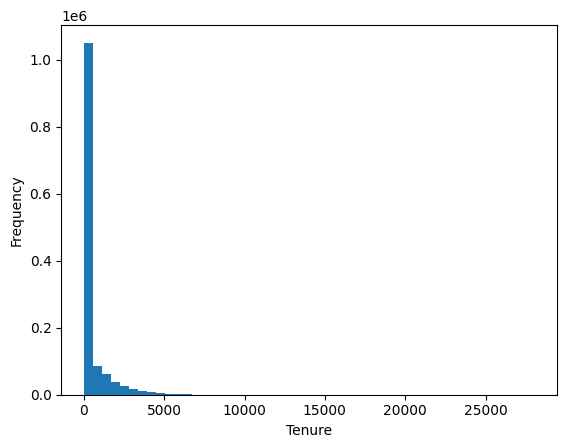

<Figure size 640x480 with 0 Axes>

In [ ]:
# Generate a histogram of the tenure variable using matplotlib
plt.hist(df["tenure"], bins=50)
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title("")
plt.show()
plt.savefig('tenure.svg', format='svg')

This histogram indicates that `tenure` has a skewed distribution, with a concentration of values towards the lower end and the presence of outliers.

Next, we will look at the distribution of the age variable.

**Age**

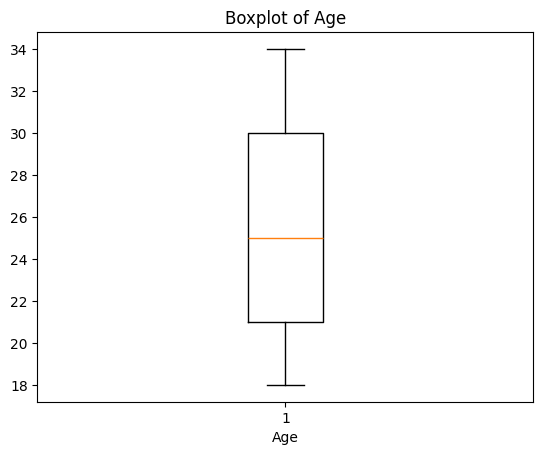

Index(['UQNO', 'PERSONNO', 'Survey_Date', 'Q13GENDER', 'Q14AGE',
       'Q15POPULATION', 'Q18FIELD', 'Q16MARITALSTATUS', 'Q17EDUCATION',
       'Q18FIELD.1', 'Education_Status', 'Q19ATTE', 'Q110EDUI', 'Q24APDWRK',
       'sector1', 'Q24BOWNBUSNS', 'Q24CUNPDWRK', 'Q25APDWRK', 'Q31ALOOKWRK',
       'Q31BSTARTBUSNS', 'Q3201REGISTER', 'Q313TIMEUNEMPLOY',
       'Q41MULTIPLEJOBS', 'Q319eUIF', 'Q319hGRANTS', 'NEET', 'Unempl_status',
       'Long_term_unempl', 'Underempl', 'At_least_1', 'Status', 'Indus',
       'Occup', 'year_start', 'month_start', 'Province', 'Weight',
       'underemployed', 'employed', 'tenure', 'industry', 'Gender'],
      dtype='object')

In [ ]:
# Generate a boxplot of the birthyear variable using matplotlib

plt.boxplot(df['Q14AGE'])
plt.title("Boxplot of Age")
plt.xlabel("Age")

plt.show()

df.columns
#df.shape

In [ ]:
#  get the key statistics of `Q14AGE` using pandas.DataFrame.describe()
df['Q14AGE'].astype(int).describe()

,Q14AGE
count,1.305343e+06
mean,2.550950e+01
std,4.899682e+00
min,1.800000e+01
25%,2.100000e+01
50%,2.500000e+01
75%,3.000000e+01
max,3.400000e+01


## Bivariate Analysis

Now, let us look at the relationships between a few variables.

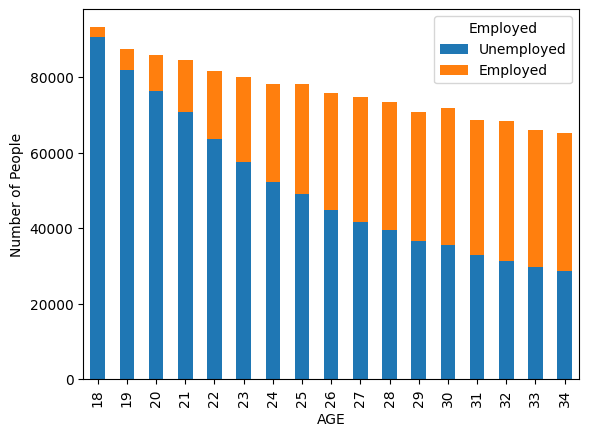

In [ ]:
# Count the number of employed and unemployed per age
df_count = df.groupby(['Q14AGE', 'employed']).size().unstack(fill_value=0)

# Plotting the bar plot
df_count.plot(kind='bar', stacked=True)
plt.xlabel('AGE')
plt.ylabel('Number of People')
#plt.title('Count of Employed and Unemployed per Age')
plt.legend(title='Employed', labels=['Unemployed', 'Employed'])
plt.show()

This plot shows that older individuals are generally more likely to be employed compared to younger individuals, in our dataset.

### Population-related data

The sampling weights for the data collected from the sampled households are constructed so that the responses
could be properly expanded to represent the entire civilian population of South Africa. The weights are the result of
calculations involving several factors, including original selection probabilities, adjustment for non-response, and
benchmarking to known population estimates from the Demographic Division of Stats SA.

Next, we will calculate the population-level estimated employed persons per province and gender.

In [ ]:
# Calculate the percentage of employed per gender for each province

# Filter for rows where employed is "yes"
df_employed_yes = df[df['employed'] == 'yes']

# Group by 'Province' and 'Gender', summing up the 'Weight' column for each group
df_province_gender = df_employed_yes.groupby(['Province', 'Gender'])['Weight'].sum().reset_index(name='Num_Employed')
df_province_gender.head()

,Province,Gender,Num_Employed
0,1,female,2.628352e+07
1,1,male,3.149129e+07
2,2,female,1.565546e+07
3,2,male,2.040305e+07
4,3,female,3.374067e+06


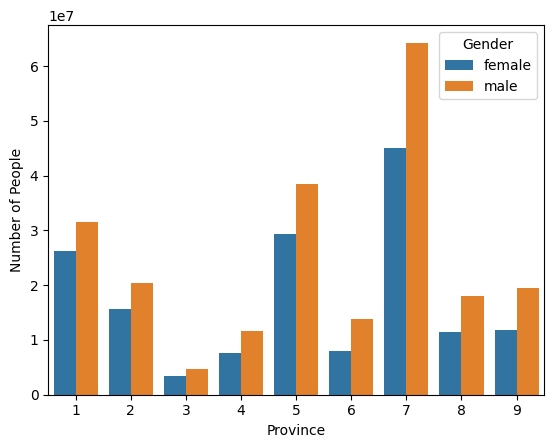

In [ ]:
# Plotting the bar plot
sns.barplot(data=df_province_gender, x='Province', y='Num_Employed', hue='Gender')

plt.xlabel('Province')
plt.ylabel('Number of People')
#plt.title('Count of Employed per Gender and Province')
plt.legend(title='Gender')
plt.show()

The above plot shows that in Province 1, the number of employed males might be significantly higher than the number of employed females, indicating a gender disparity in employment. Conversely, in Province 2, the number of employed females could be higher than that of males, suggesting a different trend. This pattern continues across all provinces, with some showing a balanced employment distribution between genders, while others exhibit noticeable differences. By examining these numbers, researchers can identify specific provinces where gender-based employment inequalities are more pronounced. This information is crucial for policymakers and organizations aiming to address these disparities and promote gender equality in the workforce. Understanding these trends can help in developing targeted interventions to support underrepresented groups and ensure equitable employment opportunities across all regions.



In [ ]:
df_province_gender

,Province,Gender,Num_Employed
0,1,female,2.628352e+07
1,1,male,3.149129e+07
2,2,female,1.565546e+07
3,2,male,2.040305e+07
4,3,female,3.374067e+06
5,3,male,4.777667e+06
6,4,female,7.646241e+06
7,4,male,1.165888e+07
8,5,female,2.929100e+07
9,5,male,3.852828e+07


Let's have a look at the quarter-level values.

In [ ]:
# Group by 'Survey_Date', 'Province', and 'Gender', summing up the 'Weight' column for each group
df_quarterly = df_employed_yes.groupby(['Survey_Date', 'Province', 'Gender'])['Weight'].sum().reset_index(name='Num_Employed')

df_quarterly

,Survey_Date,Province,Gender,Num_Employed
0,2008-03-01,1,female,410623.811899
1,2008-03-01,1,male,503304.894311
2,2008-03-01,2,female,267005.684437
3,2008-03-01,2,male,339295.326766
4,2008-03-01,3,female,59121.489613
...,...,...,...,...
1165,2024-03-01,7,male,853611.452875
1166,2024-03-01,8,female,199023.189482
1167,2024-03-01,8,male,252768.903376
1168,2024-03-01,9,female,207631.298348


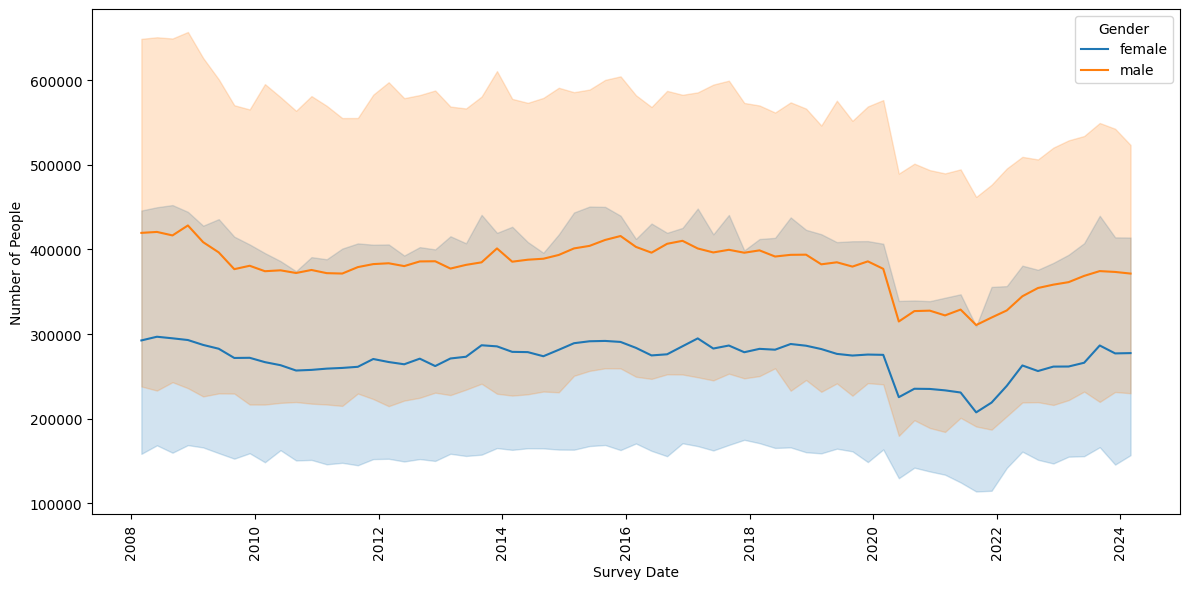

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_quarterly, x='Survey_Date', y='Num_Employed', hue='Gender')
plt.title('')
plt.xlabel('Survey Date')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Modeling

We aim to forecast the number of employed individuals per gender and province for the upcoming quarter starting in June 2024 using the ARIMA (AutoRegressive Integrated Moving Average) model. The ARIMA model is chosen for its ability to capture time-series patterns and fluctuations in data over time.

In [ ]:
# Load libraries
from statsmodels.tsa.arima.model import ARIMA
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

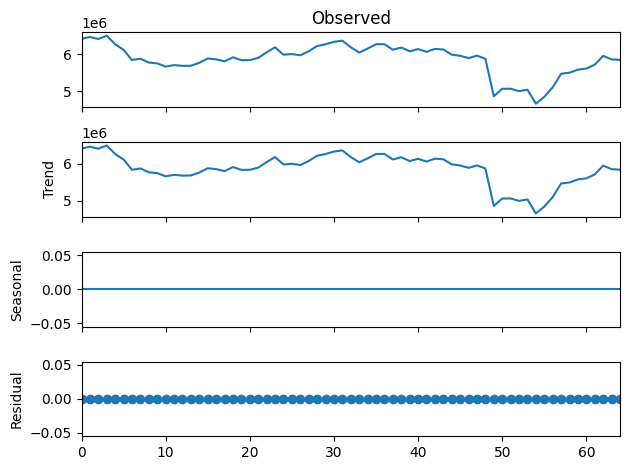

In [ ]:
# Group df_employed_yes by Survey_Date, sum the 'Weight' column, and reset index with a new column named 'Num_Employed'
df_total = df_employed_yes.groupby(['Survey_Date'])['Weight'].sum().reset_index(name='Num_Employed')
# Create a list 'history' containing the values from the 'amount' column in df_total
history = [x for x in  df_total['Num_Employed']]
# Perform seasonal decomposition on the 'history' data using the additive model with period=1
result = seasonal_decompose(history, model='additive', period=1)

result.plot()
pyplot.show()

**Seasonality Component:** The flat line in the seasonality component indicates that there are no recurring patterns at regular intervals (e.g., monthly, quarterly, yearly) in the data. This suggests that the data does not have seasonal effects.

**Residuals Component:** The flat line in the residuals component implies that there are no significant random fluctuations or noise left in the data after removing the trend. This indicates a good fit of the trend model to the data, as the residuals do not exhibit any remaining patterns or variability.


The time series decomposition plot provided above breaks down youth employment data into observed, trend, seasonal, and residual components. The observed component shows the actual data over time, while the trend component highlights the long-term progression. The seasonal component, appearing as a flat line, indicates no significant seasonal effects. The residuals display random variations around a zero line, representing anomalies not explained by trend or seasonality. This decomposition is crucial for understanding the underlying patterns in youth employment, identifying trends, and making accurate predictions. The presence of a trend suggests non-stationarity, as the statistical properties of the series change over time.


### Validation

Below, we will validate predictions using ARIMA models for each unique combination of province and gender in the dataset.

Iterating through each province and gender combination, we will filters the data and separates it into training and test sets based on survey dates. Using the ARIMA model with an order of (1,1,0), we forecast the next value (`yhat`) and round it to the nearest integer.

Results are stored in a DataFrame (`df_results`) containing columns for predicted values (`yhat`), actual test values (`actual`), and a key identifying the province-gender combination (`key`).

# Data Differencing

In time series analysis, $\textbf{data differencing}$ is a crucial technique used to stabilize the mean of a time series by removing changes in the level of the series, which can be caused by trends or seasonality. After examining the data, we observed a noticeable trend, indicating that the mean value of the series is not constant over time. This violates one of the key assumptions of many time series forecasting models, which require stationarity. To address this issue, we applied first-order differencing, which involves subtracting the previous observation from the current observation. Mathematically, this can be represented as:

\begin{align*}
Y_t' = Y_t - Y_{t-1}
\end{align*}

where $Y_t'$ is the differenced value at time t, $Y_t$is the original value at time t, and $Y_{t-1}$ is the value at the previous time point.


In [ ]:
# Validation
# Initialize a dictionary to store predictions

predictions_dict = {}
actual_dict = {}

# Create last_date to split the training and validation sets
last_date = df_quarterly['Survey_Date'].unique()[len(df_quarterly['Survey_Date'].unique()) - 1]

# Get unique combinations of province and gender
combinations = df_quarterly.groupby(['Province', 'Gender']).size().reset_index()[['Province', 'Gender']]
df_results = pd.DataFrame(columns=['yhat', 'actual', 'key'])
'''
# Loop through each combination
for index, row in combinations.iterrows():
    province = row['Province']
    gender = row['Gender']

    # Filter data for the current combination
    df_subset_train = df_quarterly[(df_quarterly['Province'] == province) & (df_quarterly['Gender'] == gender)]

    # Create the train set
    train = [x for x in df_subset_train['Num_Employed'][df_subset_train.Survey_Date != last_date]]
    test = df_subset_train[df_subset_train.Survey_Date == last_date]['Num_Employed'].values[0]

    # Make predictions
    predictions = list()
    model = ARIMA(train, order=(1,1,0))
    model_fit = model.fit()
    yhat = round(model_fit.forecast()[0])

    # Create a dictionary with the new data
    new_row = {'yhat': yhat, 'actual': test, 'key': (province, gender)}

    # Append the new data to df_results
    df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)

df_results


'''


"\n# Loop through each combination\nfor index, row in combinations.iterrows():\n    province = row['Province']\n    gender = row['Gender']\n\n    # Filter data for the current combination\n    df_subset_train = df_quarterly[(df_quarterly['Province'] == province) & (df_quarterly['Gender'] == gender)]\n\n    # Create the train set\n    train = [x for x in df_subset_train['Num_Employed'][df_subset_train.Survey_Date != last_date]]\n    test = df_subset_train[df_subset_train.Survey_Date == last_date]['Num_Employed'].values[0]\n\n    # Make predictions\n    predictions = list()\n    model = ARIMA(train, order=(1,1,0))\n    model_fit = model.fit()\n    yhat = round(model_fit.forecast()[0])\n\n    # Create a dictionary with the new data\n    new_row = {'yhat': yhat, 'actual': test, 'key': (province, gender)}\n\n    # Append the new data to df_results\n    df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)\n\ndf_results\n\n\n"

In [ ]:
#df_subset_train = df_quarterly[(df_quarterly['Province'] == province) & (df_quarterly['Gender'] == gender)]

#df_subset_train.head()
#df_subset_train
#df_quarterly
!pip install pmdarima

In [ ]:
results_table = []

# Loop through provinces and genders
for province in range(1, 10):  # Provinces 1 to 9
    for gender in ['male', 'female']:
        # Simulating data for the example
        # Replace these with your actual DataFrame slices
        province_data=df_quarterly[(df_quarterly['Province'] == province) & (df_quarterly['Gender'] == gender)]
        # ADF Test
        adf_result = adfuller(province_data['Num_Employed'].diff().dropna())
        adf_p_value = adf_result[1]

        # KPSS Test
        kpss_result = kpss(province_data['Num_Employed'].diff().dropna(), regression='c')
        kpss_p_value = kpss_result[1]

        # Append results
        results_table.append({
            'Province': province,
            'Gender': gender,
            'ADF p-value': adf_p_value,
            'KPSS p-value': kpss_p_value
        })

# Create a DataFrame from results
results_df = pd.DataFrame(results_table)

<ipython-input-612-342abb82b161>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(province_data['Num_Employed'].diff().dropna(), regression='c')
<ipython-input-612-342abb82b161>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(province_data['Num_Employed'].diff().dropna(), regression='c')
<ipython-input-612-342abb82b161>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(province_data['Num_Employed'].diff().dropna(), regression='c')
<ipython-input-612-342abb82b161>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-

To start with, we differenced the time series plots as there were not stationary due to the trend. The following tests were then performed to check stationarity:





#### ADF Test
The $\textbf{Augmented Dickey-Fuller (ADF) test}$ is used to determine whether a unit root is present in a univariate time series. The null and alternative hypothesis are given as follows:


\begin{align*}
H0&:\text{ The time series has a unit root.} \\
H1&:\text{ The time series does not have a unit root.}
\end{align*}

#### KPSS Test

The \textbf{Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test}, in contrast, tests the null hypothesis that the time series is stationary around a deterministic trend. The hypothesis is done as follows:



\begin{align*}
H0&:\text{ The time series is stationary.} \\
H1&:\text{ The time series is non-stationary.}
\end{align*}

The results of the gender on each province is given as following table:

In [ ]:
results_df

,Province,Gender,ADF p-value,KPSS p-value
0,1,male,4.061724e-04,0.100000
1,1,female,1.271331e-11,0.100000
2,2,male,3.827722e-18,0.100000
3,2,female,1.336987e-02,0.100000
4,3,male,5.278568e-11,0.100000
5,3,female,1.184401e-14,0.100000
6,4,male,9.868916e-16,0.100000
7,4,female,1.494742e-06,0.100000
8,5,male,1.201338e-13,0.100000
9,5,female,8.331585e-11,0.100000


For the ADF test, a small p-value (p-value < 0.05) indicates that we reject the null hypothesis (H0) while for the KPSS test, a small p-value (p-value > 0.05) indicates that we reject the null hypothesis (H0). Based on the above table, the results indicate that the time series across all provinces and genders are stationary based on both the ADF and KPSS tests since in the ADF tests all the p-values re small and KPSS's p-values are large.



# Methodology

In this study, we utilize a variety of time series forecasting models, including Autoregressive (AR), Moving Average (MA), Autoregressive Moving Average (ARMA), Autoregressive Integrated Moving Average (ARIMA), and Seasonal ARIMA (SARIMA). These models are selected based on their suitability for analyzing the employment data and their ability to capture underlying trends and seasonal patterns.

The primary assumptions underlying these models include linearity, stationarity, and the absence of multicollinearity. It is essential that the time series data adheres to these assumptions to ensure the validity of the forecasts produced by these models.

Although models such as ARCH (Autoregressive Conditional Heteroskedasticity) and GARCH (Generalized Autoregressive Conditional Heteroskedasticity) are effective for time series data characterized by volatility clustering, they are not appropriate for our analysis. The employment data exhibits little to no volatility, making the use of ARCH and GARCH models unnecessary. Therefore, we focus on AR, MA, ARMA, ARIMA, and SARIMA to accurately capture the trends and patterns in the data.

# Results

To determine the appropriate models for our time series analysis, we examined the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of the employment data. These tools are instrumental in identifying the underlying structure of the time series and guiding the selection of suitable ARIMA and SARIMA models.

The ACF measures the correlation between observations at different lags, providing insights into the extent of correlation between a time series and its past values. A rapid decay in the ACF plot suggests that an MA model may be appropriate, while a slow decay can indicate the presence of an AR model. The PACF, on the other hand, measures the correlation between an observation and its lagged values after removing the effects of intervening observations. A significant cut-off in the PACF plot indicates the order of the AR component in the model.

Given the diversity in the dataset, I used different models for various combinations of gender and province. This approach recognizes that employment trends may differ significantly across these demographics. By analyzing the ACF and PACF plots for each combination, we could tailor our model selection to fit the specific characteristics of the data, ensuring a more accurate representation of the underlying patterns.

While selecting models, we were mindful of the balance between underfitting and overfitting. Even though we observed many significant spikes in the ACF plots a lot, it is crucial to avoid fitting overly complex models that could lead to overfitting. Overfitting occurs when a model captures noise rather than the underlying signal, resulting in poor predictive performance on unseen data. Conversely, underfitting can happen when a model is too simplistic to capture essential features of the data.

To mitigate these risks, we employed model validation techniques, such as cross-validation (RMSE), to assess model performance. This careful approach allowed us to select models that not only fit the training data well but also generalized effectively to new observations, ultimately enhancing the reliability of our forecasts for employment trends across different gender and province combinations.


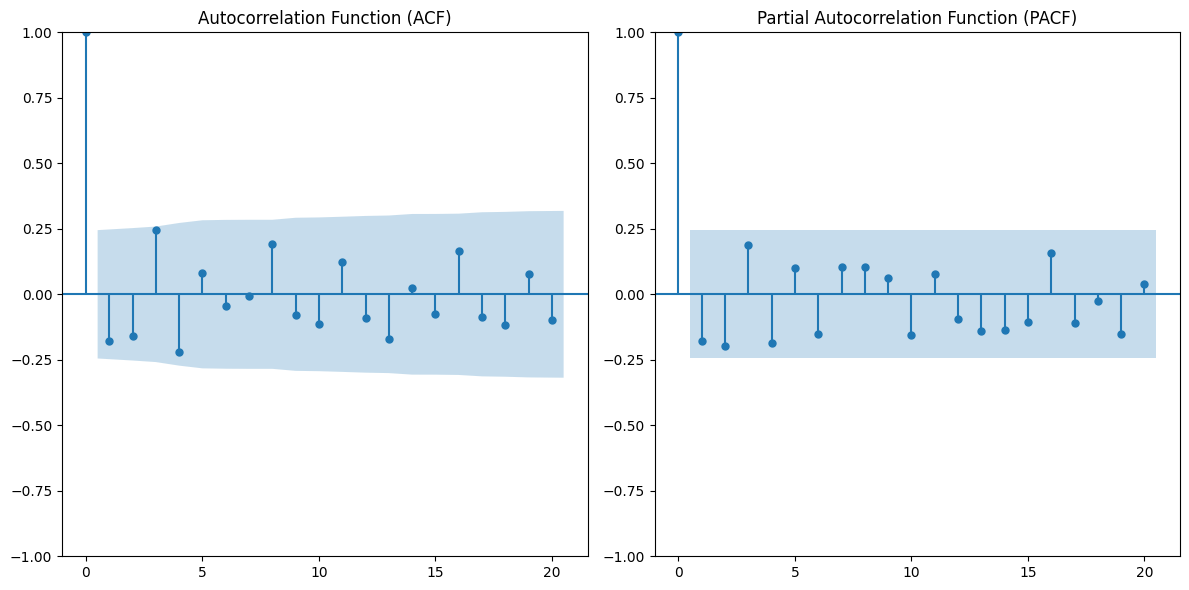

-483.0756727299886


In [ ]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

df_results = pd.DataFrame(columns=['yhat', 'actual', 'key'])


province_1_male_data = df_quarterly[(df_quarterly['Province'] == 1) & (df_quarterly['Gender'] == 'male')]
train = [x for x in province_1_male_data['Num_Employed'][province_1_male_data.Survey_Date != last_date]]
test = province_1_male_data[province_1_male_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_1_male_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_1_male_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(1, 1, 3)) #113

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
yhat

print(test-yhat)
new_row2 = {'yhat': yhat, 'actual': test, 'key': (1, "male")}






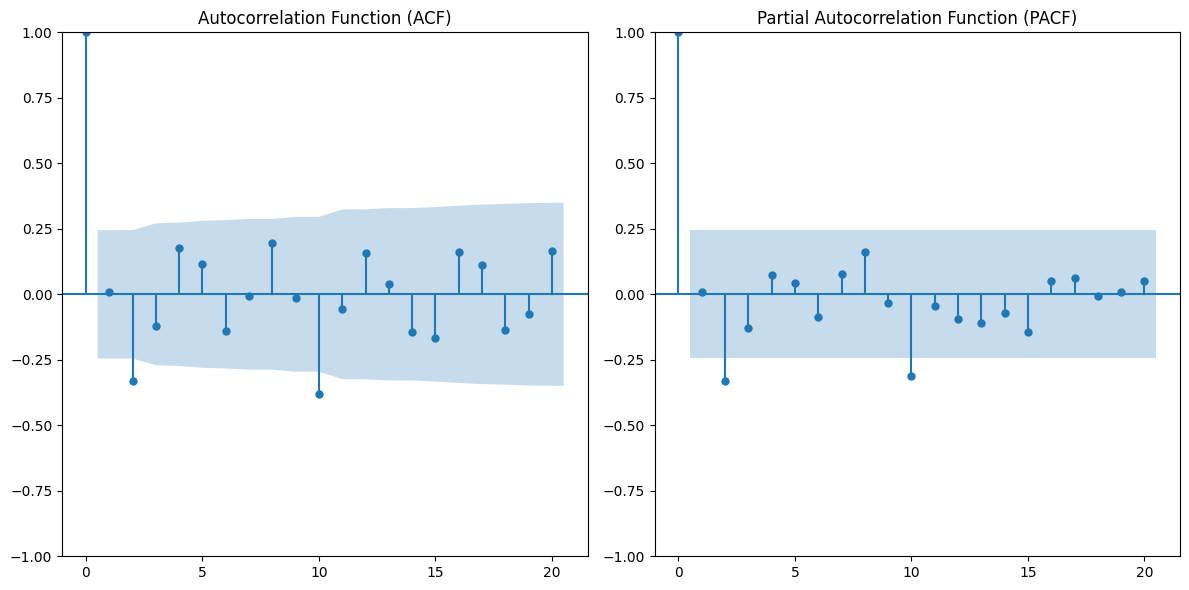

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-50.72428000002401


<ipython-input-615-ef7ac8b337fd>:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row1])], ignore_index=True)


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_1_female_data = df_quarterly[(df_quarterly['Province'] == 1) & (df_quarterly['Gender'] == 'female')]
train = [x for x in province_1_female_data['Num_Employed'][province_1_female_data.Survey_Date != last_date]]
test = province_1_female_data[province_1_female_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_1_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_1_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(10, 1, 10))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
#yhat

test-yhat
#test-yhat
print(test-yhat)

new_row1 = {'yhat': yhat, 'actual': test, 'key': (1, "female")}

df_results = pd.concat([df_results, pd.DataFrame([new_row1])], ignore_index=True)
df_results = pd.concat([df_results, pd.DataFrame([new_row2])], ignore_index=True)


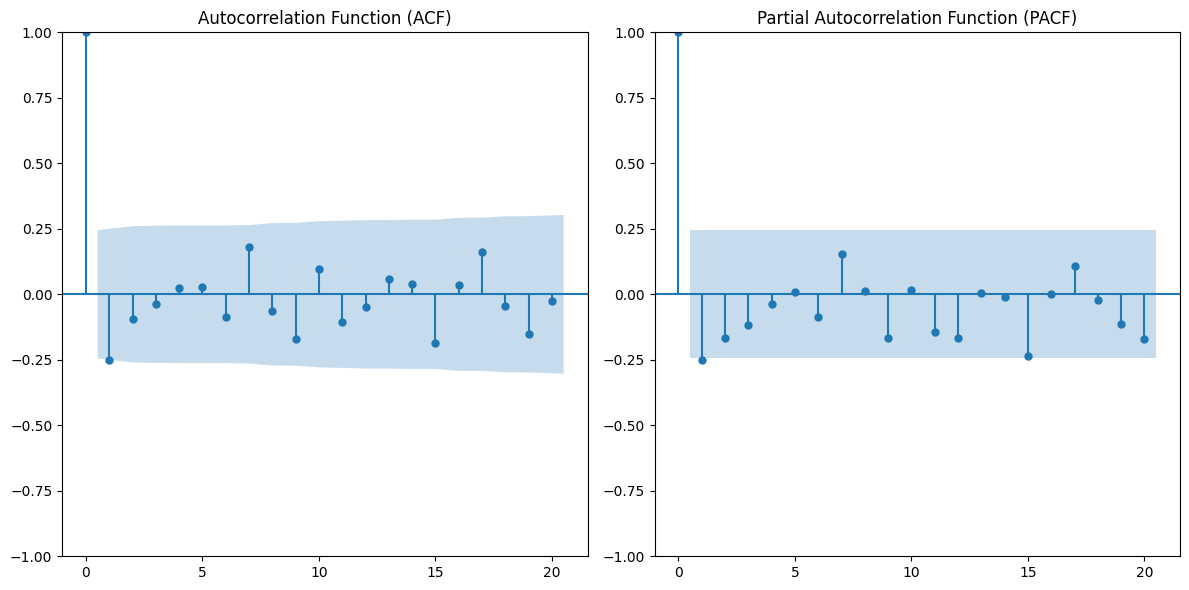

-417.7891936600208


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_2_male_data = df_quarterly[(df_quarterly['Province'] == 2) & (df_quarterly['Gender'] == 'male')]
train = [x for x in province_2_male_data['Num_Employed'][province_2_male_data.Survey_Date != last_date]]
test = province_2_male_data[province_2_male_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_2_male_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_2_male_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(1, 1, 4))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
yhat

test-yhat
#test-yhat
print(test-yhat)


new_row2 = {'yhat': yhat, 'actual': test, 'key': (2, "male")}

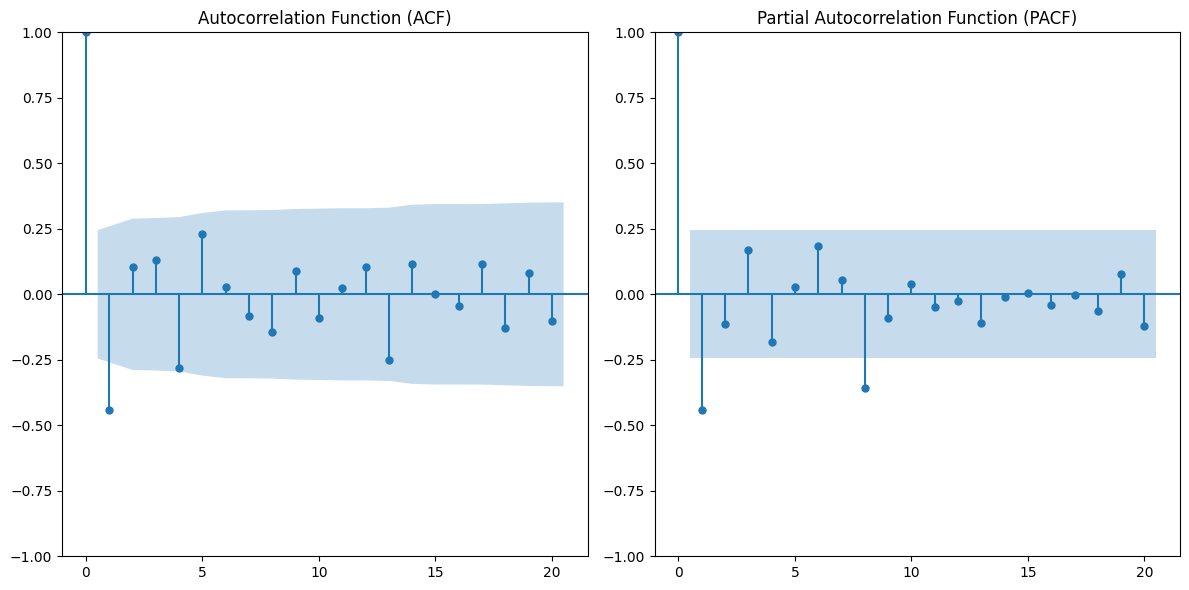

4397.969020169985


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_2_female_data = df_quarterly[(df_quarterly['Province'] == 2) & (df_quarterly['Gender'] == 'female')]
train = [x for x in province_2_female_data['Num_Employed'][province_2_female_data.Survey_Date != last_date]]
test = province_2_female_data[province_2_female_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_2_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_2_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(2,0,1) ) #, seasonal_order=(1, 1, 0, 3)) ##201 11 1 0 4

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
#yhat

print(test-yhat)
#test-yhat
#print(test-yhat)

new_row1 = {'yhat': yhat, 'actual': test, 'key': (2, "female")}

df_results = pd.concat([df_results, pd.DataFrame([new_row1])], ignore_index=True)
df_results = pd.concat([df_results, pd.DataFrame([new_row2])], ignore_index=True)


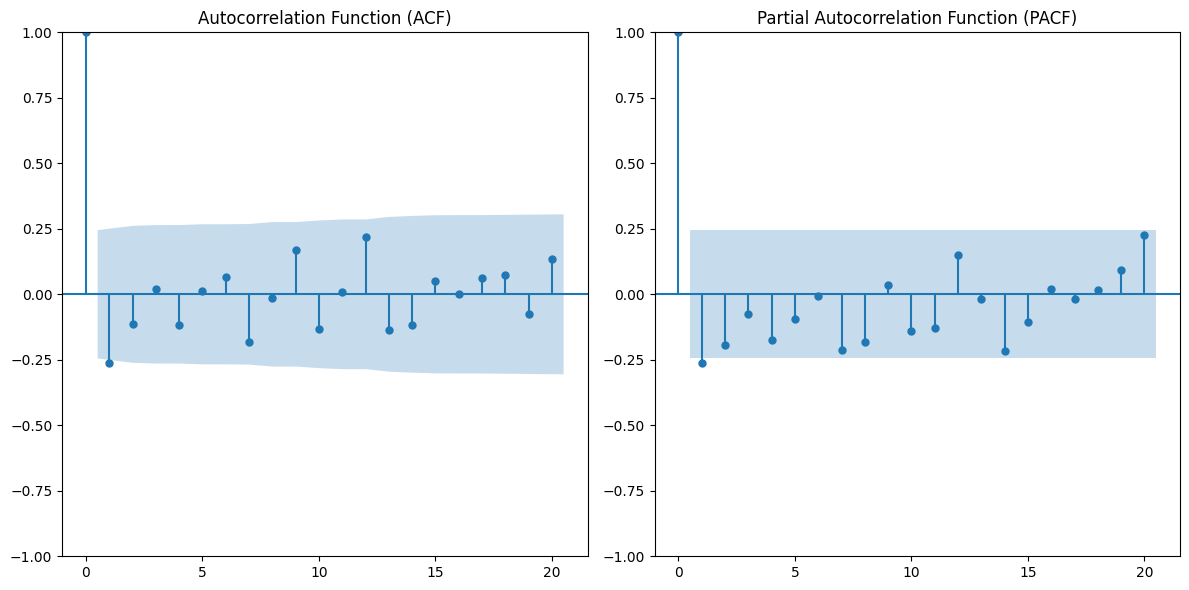

55.786319680002634


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_3_male_data = df_quarterly[(df_quarterly['Province'] == 3) & (df_quarterly['Gender'] == 'male')]
train = [x for x in province_3_male_data['Num_Employed'][province_3_male_data.Survey_Date != last_date]]
test = province_3_male_data[province_3_male_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_3_male_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_3_male_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(1, 1, 8))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
yhat

test-yhat
#test-yhat
print(test-yhat)

new_row2 = {'yhat': yhat, 'actual': test, 'key': (3, "male")}


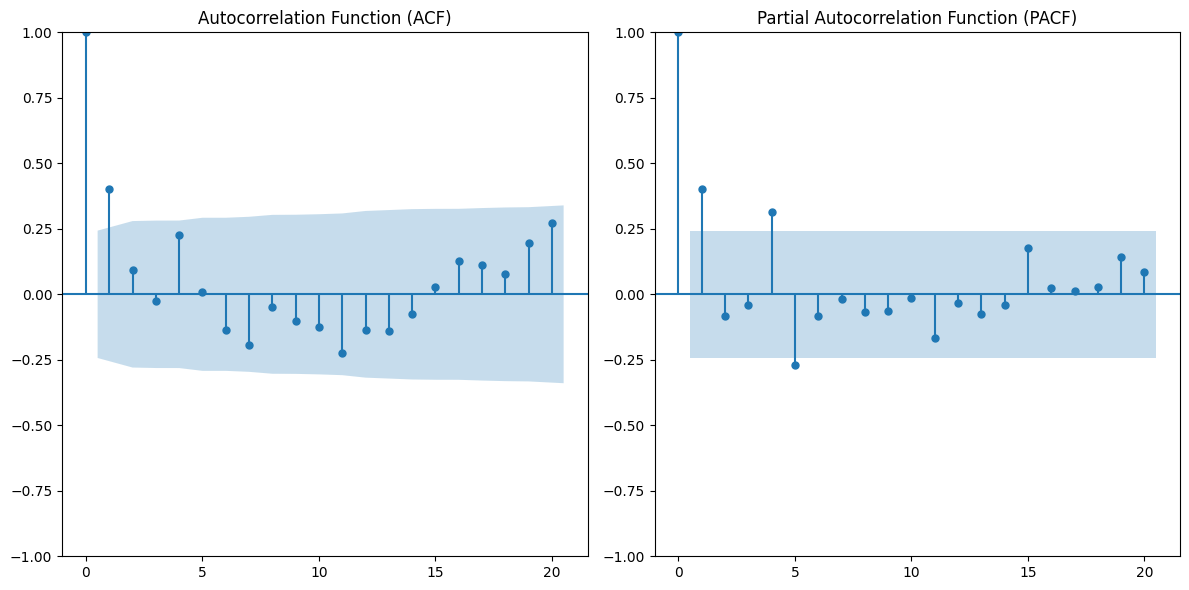

-75.05893815000309


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_3_female_data = df_quarterly[(df_quarterly['Province'] == 3) & (df_quarterly['Gender'] == 'female')]
train = [x for x in province_3_female_data['Num_Employed'][province_3_female_data.Survey_Date != last_date]]
test = province_3_female_data[province_3_female_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_3_female_data['Num_Employed'], ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_3_female_data['Num_Employed'], ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(0, 0, 1))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
#yhat

print(test-yhat)
#test-yhat


new_row1 = {'yhat': yhat, 'actual': test, 'key': (3, "female")}

df_results = pd.concat([df_results, pd.DataFrame([new_row1])], ignore_index=True)
df_results = pd.concat([df_results, pd.DataFrame([new_row2])], ignore_index=True)


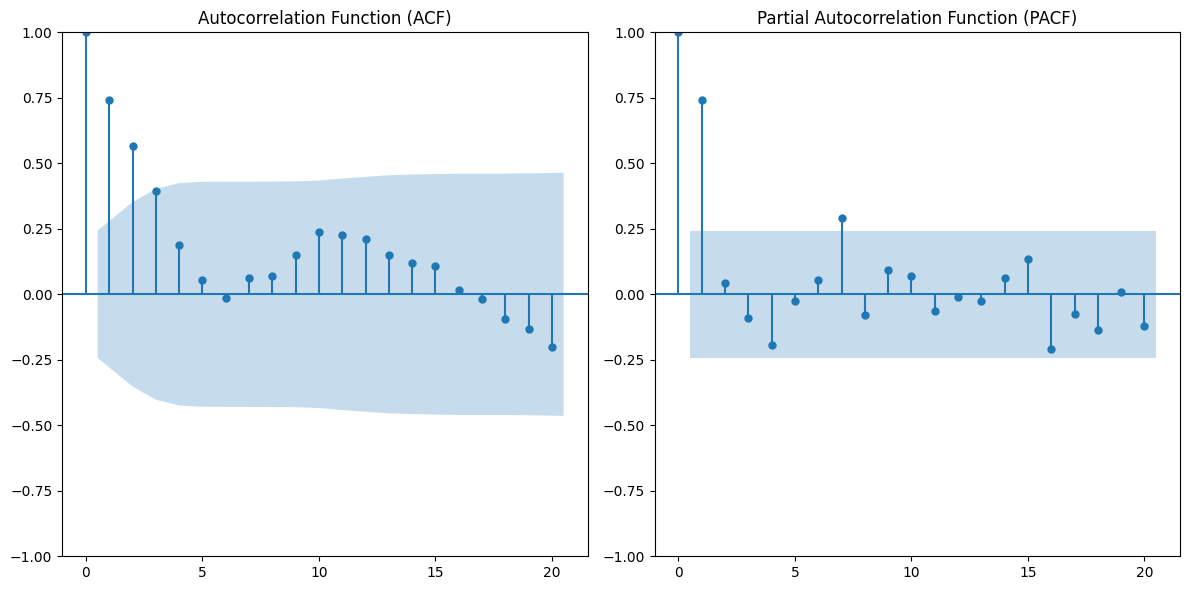

356.72307474998524


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_4_male_data = df_quarterly[(df_quarterly['Province'] == 4) & (df_quarterly['Gender'] == 'male')]
train = [x for x in province_4_male_data['Num_Employed'][province_4_male_data.Survey_Date != last_date]]
test = province_4_male_data[province_4_male_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_4_male_data['Num_Employed'], ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_4_male_data['Num_Employed'], ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(1, 0, 3), seasonal_order=(1, 1, 1, 4))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
yhat

test-yhat
#test-yhat
print(test-yhat)

new_row2 = {'yhat': yhat, 'actual': test, 'key': (4, "male")}


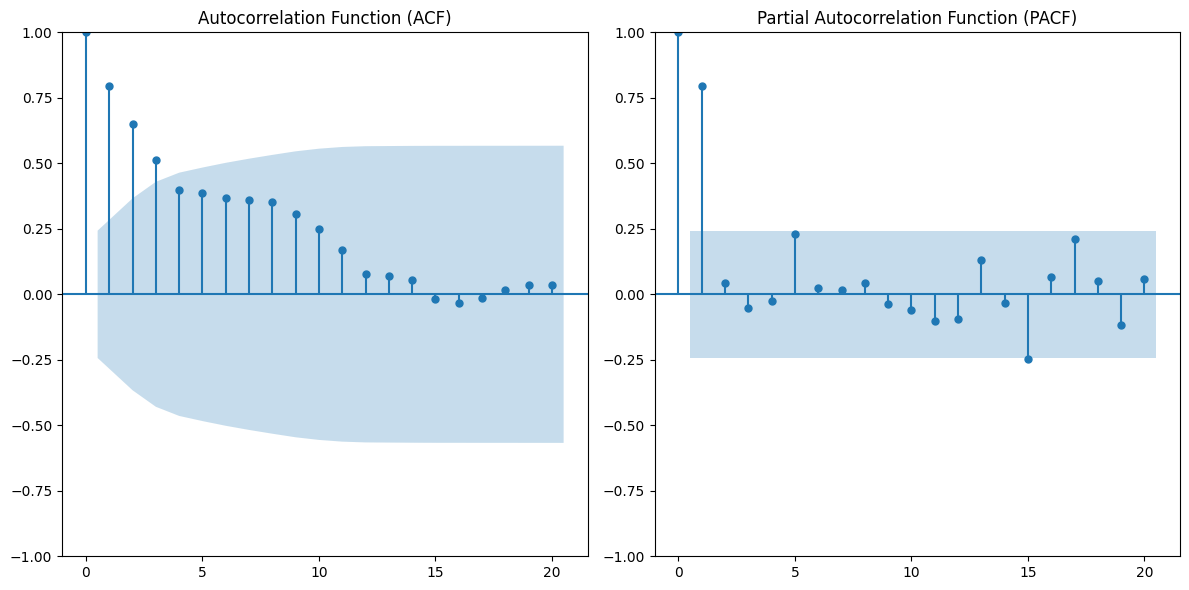

-95.14266667999618


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_4_female_data = df_quarterly[(df_quarterly['Province'] == 4) & (df_quarterly['Gender'] == 'female')]
train = [x for x in province_4_female_data['Num_Employed'][province_4_female_data.Survey_Date != last_date]]
test = province_4_female_data[province_4_female_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_4_female_data['Num_Employed'], ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_4_female_data['Num_Employed'], ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(1, 0, 3))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
#yhat

print(test-yhat)
#test-yhat
#print(test-yhat)


new_row1 = {'yhat': yhat, 'actual': test, 'key': (4, "female")}

df_results = pd.concat([df_results, pd.DataFrame([new_row1])], ignore_index=True)
df_results = pd.concat([df_results, pd.DataFrame([new_row2])], ignore_index=True)


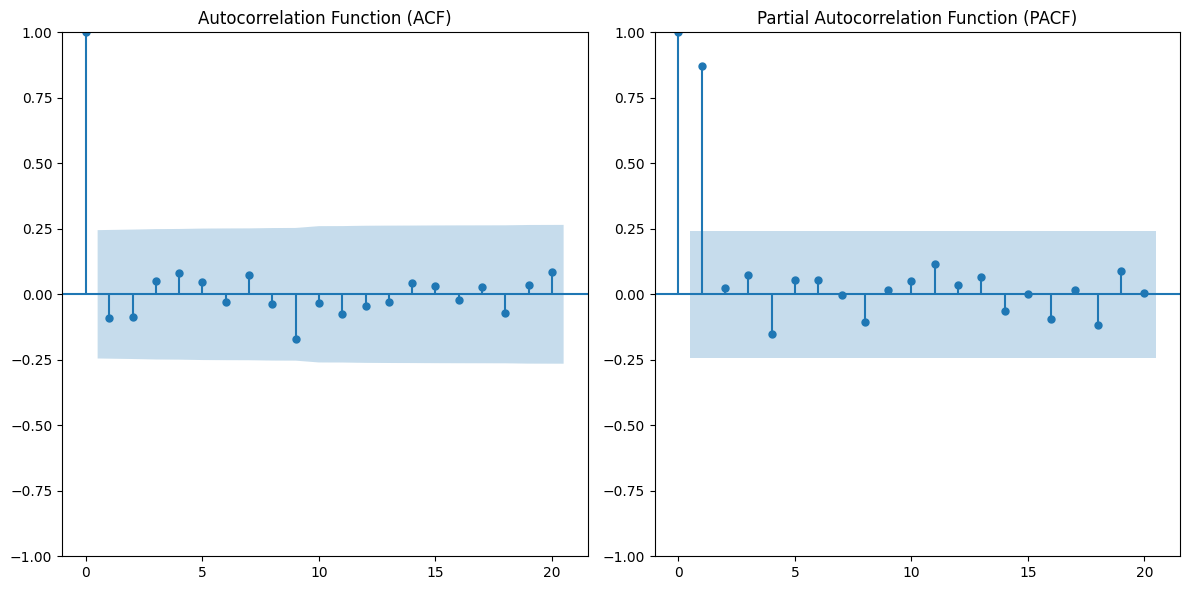

3852.667221634998


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_5_male_data = df_quarterly[(df_quarterly['Province'] == 5) & (df_quarterly['Gender'] == 'male')]
train = [x for x in province_5_male_data['Num_Employed'][province_5_male_data.Survey_Date != last_date]]
test = province_5_male_data[province_5_male_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_5_male_data['Num_Employed'].diff().dropna() , ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_5_male_data['Num_Employed'], ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#.diff().dropna()

model = ARIMA(train, order=(1,1, 1), seasonal_order=(1, 1, 3, 4))  #112  1 1 1 4
#model = auto_arima(train, seasonal=False, stepwise=True, trace=True)
model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
yhat

test-yhat
#test-yhat
print(test-yhat)

new_row2 = {'yhat': yhat, 'actual': test, 'key': (5, "male")}



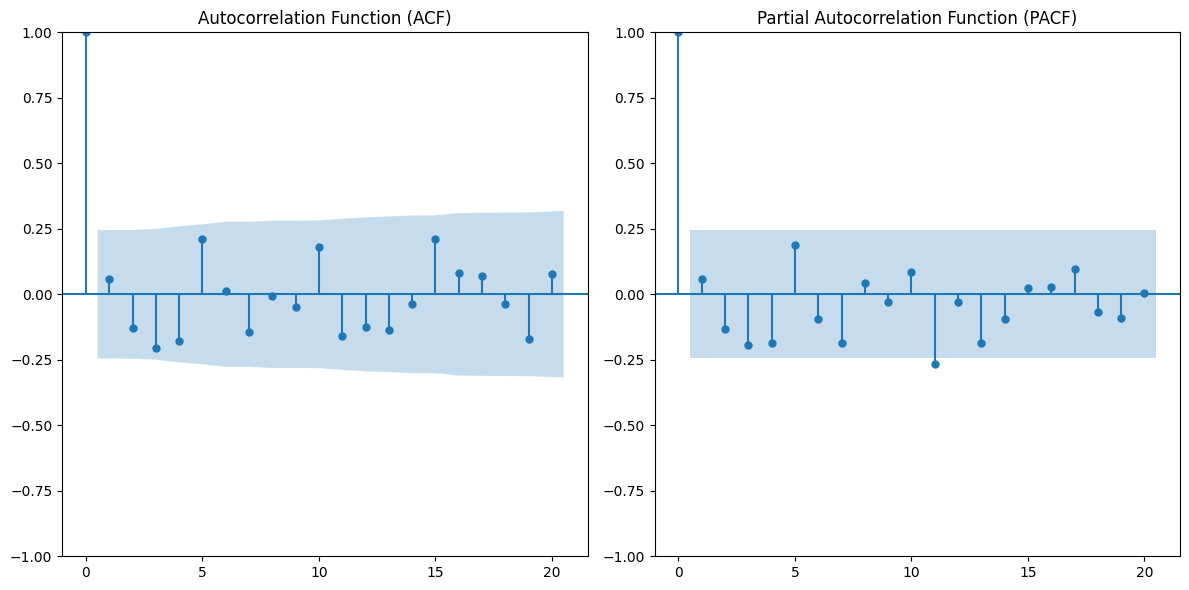

1140.634324810002


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_5_female_data = df_quarterly[(df_quarterly['Province'] == 5) & (df_quarterly['Gender'] == 'female')]
train = [x for x in province_5_female_data['Num_Employed'][province_5_female_data.Survey_Date != last_date]]
test = province_5_female_data[province_5_female_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_5_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_5_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(1, 0, 1), seasonal_order=(1, 1, 2, 4))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
#yhat

print(test-yhat)
#test-yhat
#print(test-yhat)

new_row1 = {'yhat': yhat, 'actual': test, 'key': (5, "female")}

df_results = pd.concat([df_results, pd.DataFrame([new_row1])], ignore_index=True)
df_results = pd.concat([df_results, pd.DataFrame([new_row2])], ignore_index=True)


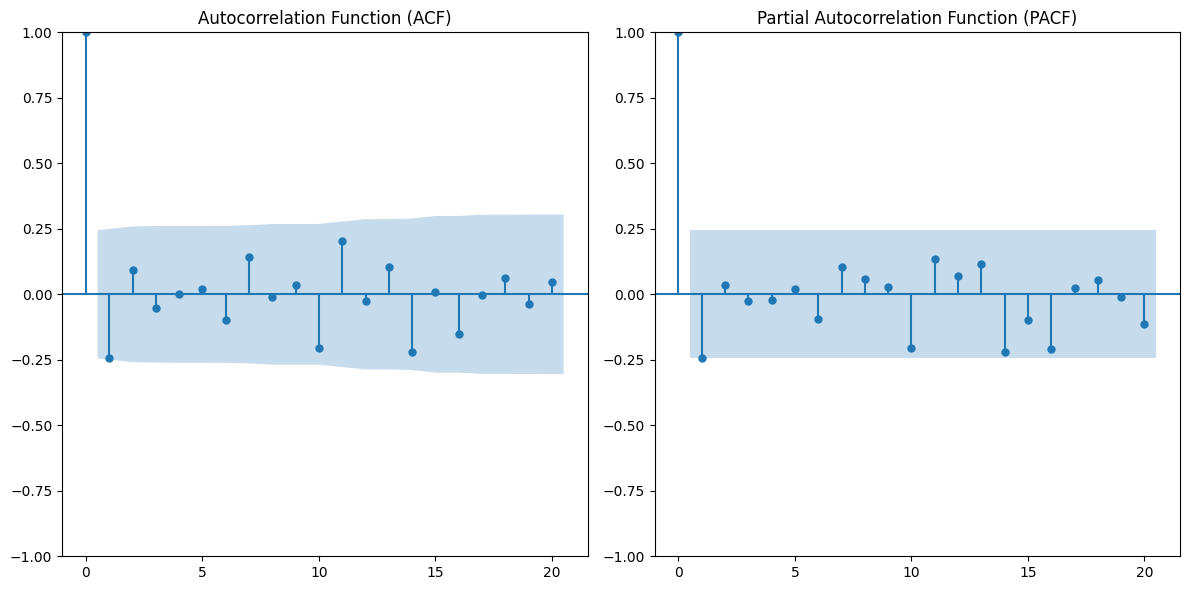

-1470.5295300100115


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_6_male_data = df_quarterly[(df_quarterly['Province'] == 6) & (df_quarterly['Gender'] == 'male')]
train = [x for x in province_6_male_data['Num_Employed'][province_6_male_data.Survey_Date != last_date]]
test = province_6_male_data[province_6_male_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_6_male_data['Num_Employed'].diff().dropna() , ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_6_male_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#.diff().dropna()

model = ARIMA(train, order=(1, 0, 3), seasonal_order=(1, 1, 1, 4))
#model = auto_arima(train, seasonal=False, stepwise=True, trace=True)
model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
yhat

test-yhat
#test-yhat
print(test-yhat)

new_row2 = {'yhat': yhat, 'actual': test, 'key': (6, "male")}



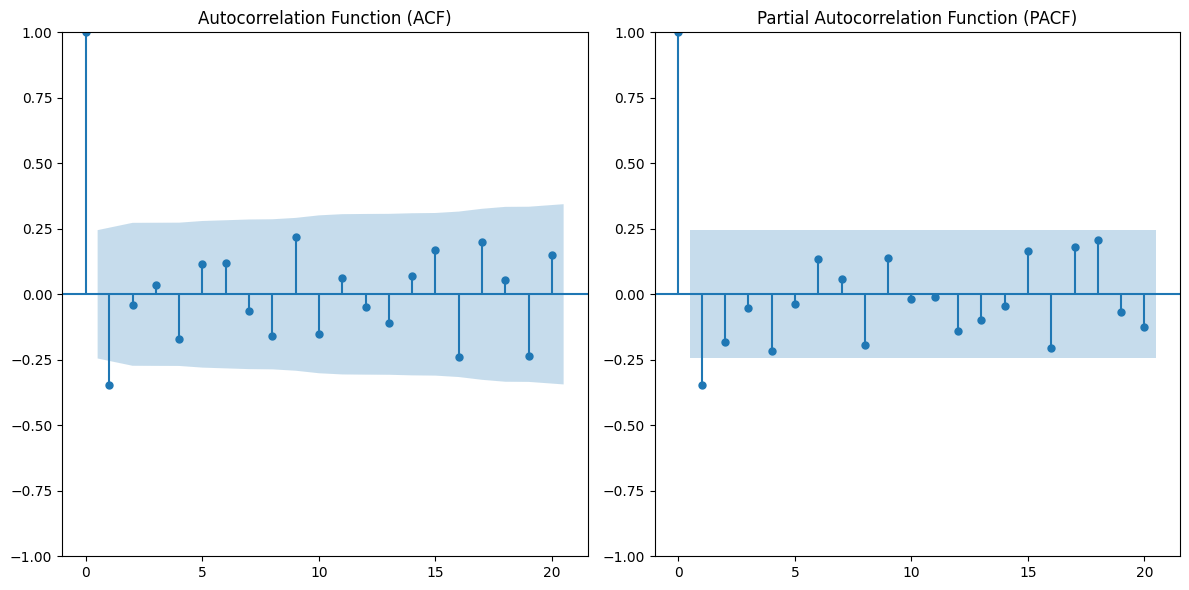

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


529.4145430100034


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_6_female_data = df_quarterly[(df_quarterly['Province'] == 6) & (df_quarterly['Gender'] == 'female')]
train = [x for x in province_6_female_data['Num_Employed'][province_6_female_data.Survey_Date != last_date]]
test = province_6_female_data[province_6_female_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_6_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_6_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(1, 1, 2), seasonal_order=(2, 1, 3, 5))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
#yhat

print(test-yhat)
#test-yhat
#print(test-yhat)

new_row1 = {'yhat': yhat, 'actual': test, 'key': (6, "female")}

df_results = pd.concat([df_results, pd.DataFrame([new_row1])], ignore_index=True)
df_results = pd.concat([df_results, pd.DataFrame([new_row2])], ignore_index=True)


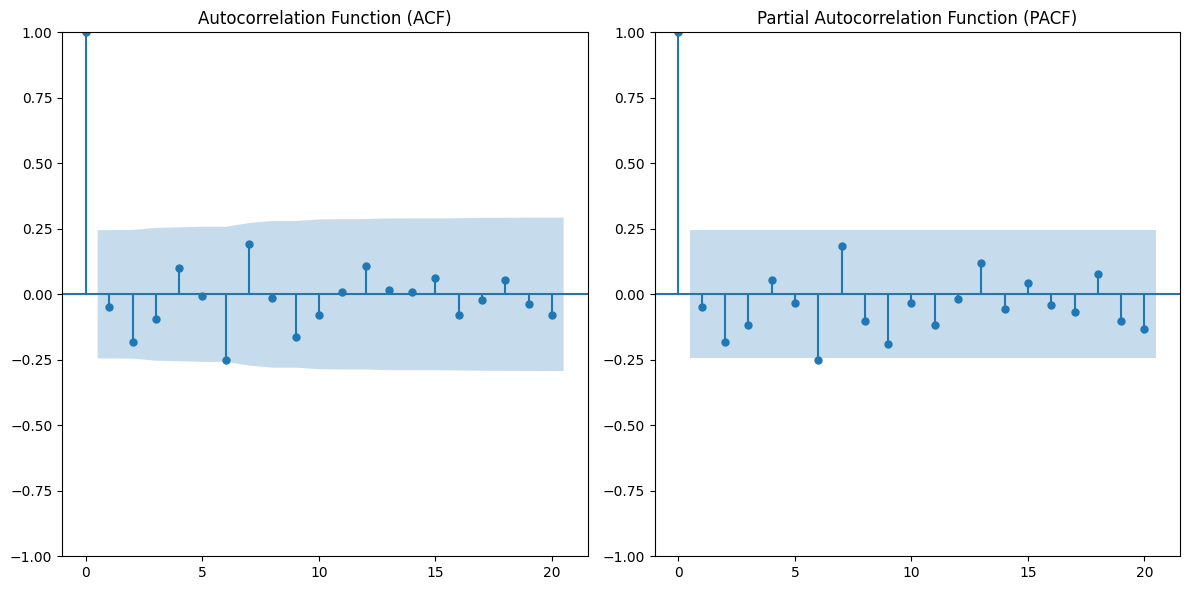

-23641.547124627046


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_7_male_data = df_quarterly[(df_quarterly['Province'] == 7) & (df_quarterly['Gender'] == 'male')]
train = [x for x in province_7_male_data['Num_Employed'][province_7_male_data.Survey_Date != last_date]]
test = province_7_male_data[province_7_male_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_7_male_data['Num_Employed'].diff().dropna() , ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_7_male_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#.diff().dropna()

model = ARIMA(train, order=(1,0,3) , seasonal_order=(1, 1, 1, 7))  # 1,1,6   ## 101 5107
#model = auto_arima(train, seasonal=False, stepwise=True, trace=True)
model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
yhat

test-yhat
#test-yhat
print(test-yhat)

new_row2 = {'yhat': yhat, 'actual': test, 'key': (7, "male")}



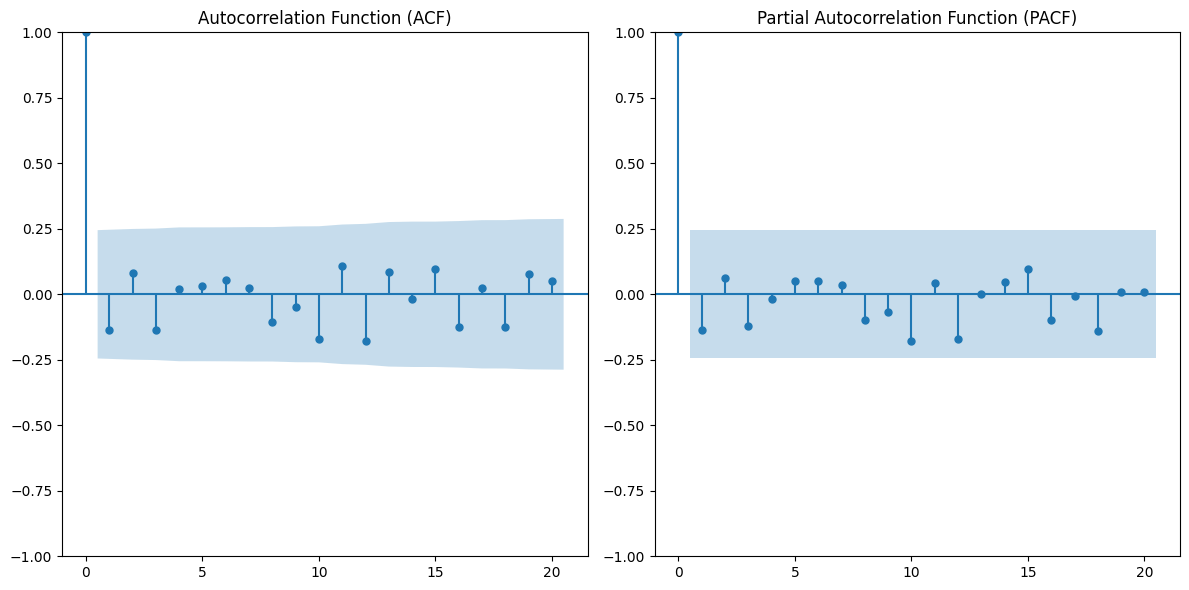

-6409.69307360996


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_7_female_data = df_quarterly[(df_quarterly['Province'] == 7) & (df_quarterly['Gender'] == 'female')]
train = [x for x in province_7_female_data['Num_Employed'][province_7_female_data.Survey_Date != last_date]]
test = province_7_female_data[province_7_female_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_7_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_7_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(1, 1, 2))#, seasonal_order=(1, 1, 3, 4))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
#yhat

print(test-yhat)
#test-yhat
#print(test-yhat)

new_row1 = {'yhat': yhat, 'actual': test, 'key': (7, "female")}

df_results = pd.concat([df_results, pd.DataFrame([new_row1])], ignore_index=True)
df_results = pd.concat([df_results, pd.DataFrame([new_row2])], ignore_index=True)


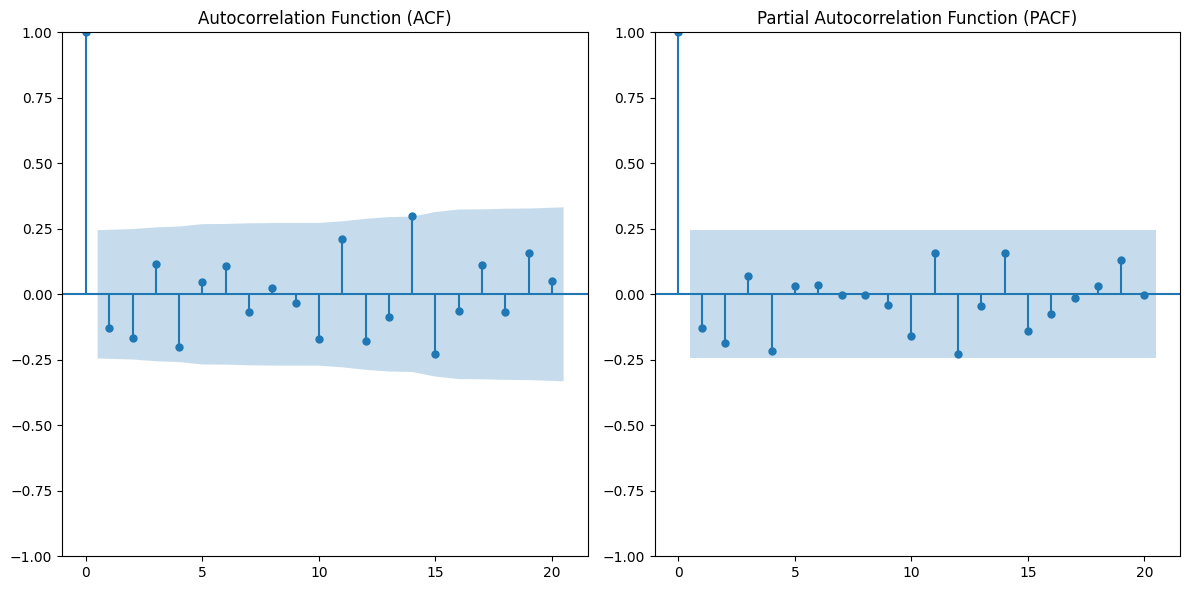

-85.09662442898843


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_8_male_data = df_quarterly[(df_quarterly['Province'] == 8) & (df_quarterly['Gender'] == 'male')]
train = [x for x in province_8_male_data['Num_Employed'][province_8_male_data.Survey_Date != last_date]]
test = province_8_male_data[province_8_male_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_8_male_data['Num_Employed'].diff().dropna() , ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_8_male_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#.diff().dropna()

model = ARIMA(train, order=(1, 1, 1)) #, seasonal_order=(1, 1, 0, 4))
#model = auto_arima(train, seasonal=False, stepwise=True, trace=True)
model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
yhat

test-yhat
#test-yhat
print(test-yhat)

new_row2 = {'yhat': yhat, 'actual': test, 'key': (8, "male")}



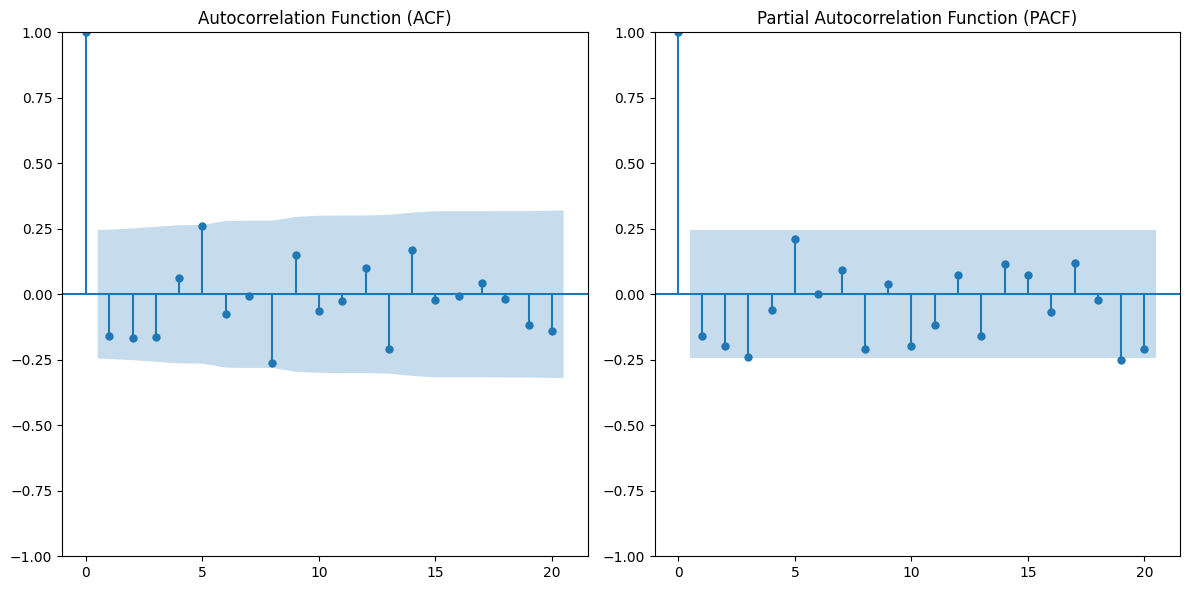

3973.18948162999


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_8_female_data = df_quarterly[(df_quarterly['Province'] == 8) & (df_quarterly['Gender'] == 'female')]
train = [x for x in province_8_female_data['Num_Employed'][province_8_female_data.Survey_Date != last_date]]
test = province_8_female_data[province_8_female_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_8_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_8_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(3, 1, 5))#, seasonal_order=(1, 1, 3, 4))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
#yhat

print(test-yhat)
#test-yhat
#print(test-yhat)

new_row1 = {'yhat': yhat, 'actual': test, 'key': (8, "female")}

df_results = pd.concat([df_results, pd.DataFrame([new_row1])], ignore_index=True)
df_results = pd.concat([df_results, pd.DataFrame([new_row2])], ignore_index=True)


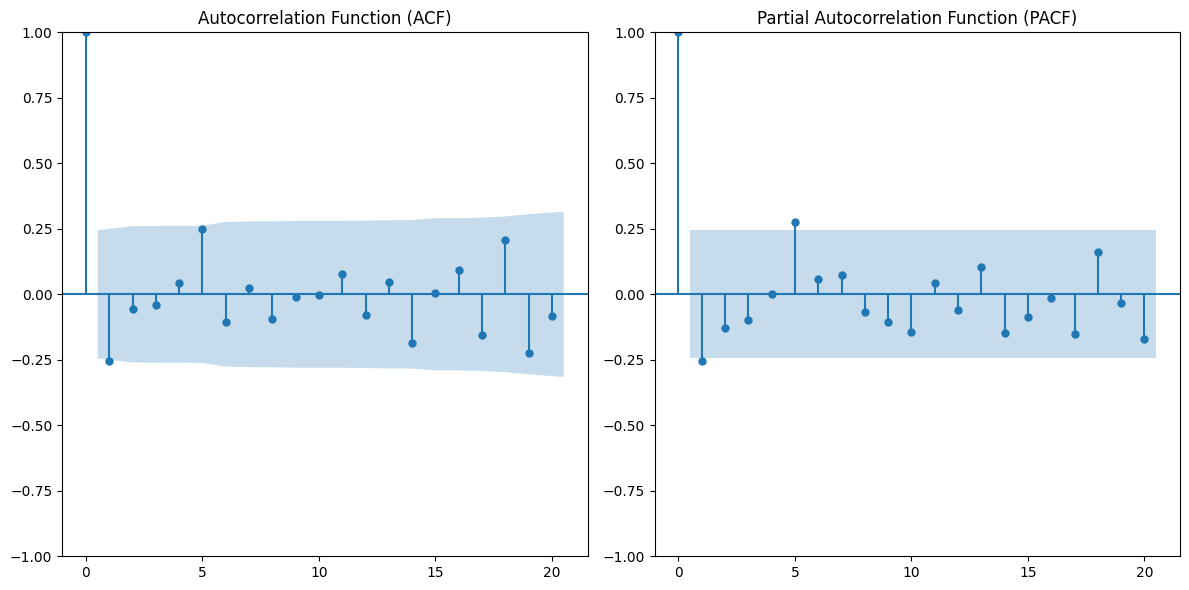

-4818.163744759979


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_9_male_data = df_quarterly[(df_quarterly['Province'] == 9) & (df_quarterly['Gender'] == 'male')]
train = [x for x in province_9_male_data['Num_Employed'][province_9_male_data.Survey_Date != last_date]]
test = province_9_male_data[province_9_male_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_9_male_data['Num_Employed'].diff().dropna() , ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_9_male_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#.diff().dropna()

model = ARIMA(train, order=(5, 1, 1)) #, seasonal_order=(1, 1, 0, 4))
#model = auto_arima(train, seasonal=False, stepwise=True, trace=True)
model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
yhat

test-yhat
#test-yhat
print(test-yhat)

new_row2 = {'yhat': yhat, 'actual': test, 'key': (9, "male")}



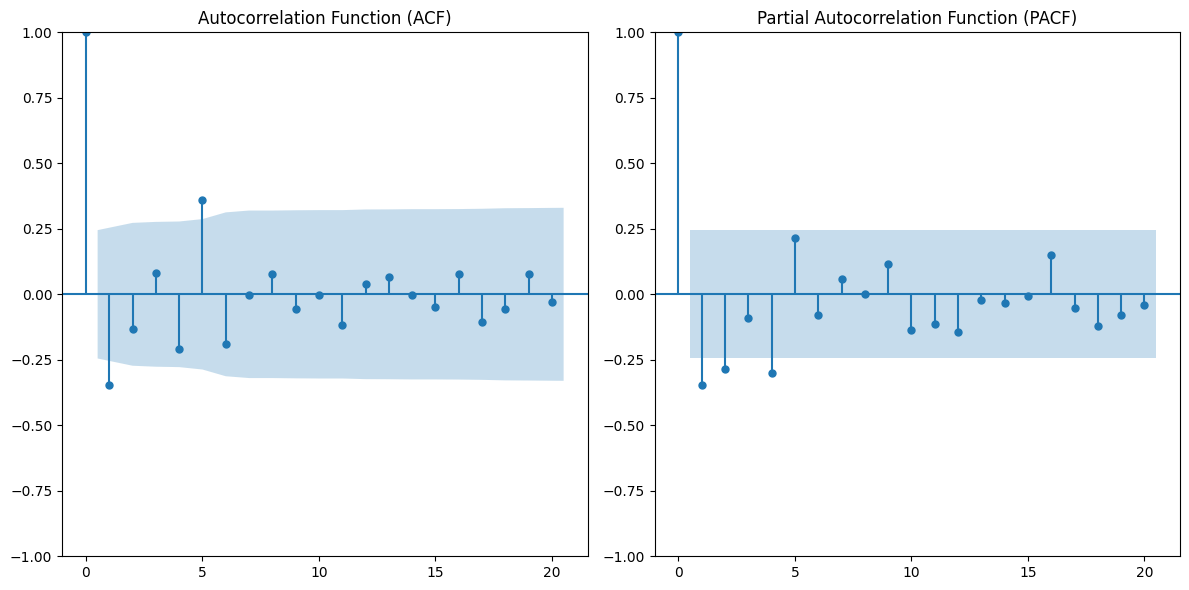

4643.29834822999


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

province_9_female_data = df_quarterly[(df_quarterly['Province'] == 9) & (df_quarterly['Gender'] == 'female')]
train = [x for x in province_9_female_data['Num_Employed'][province_9_female_data.Survey_Date != last_date]]
test = province_9_female_data[province_9_female_data.Survey_Date == last_date]['Num_Employed'].values[0]




# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(province_9_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(province_9_female_data['Num_Employed'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


model = ARIMA(train, order=(4, 1, 5))#, seasonal_order=(1, 1, 3, 4))

model_fit = model.fit()
yhat = round(model_fit.forecast()[0])
#yhat

print(test-yhat)
#test-yhat
#print(test-yhat)

new_row1 = {'yhat': yhat, 'actual': test, 'key': (9, "female")}

df_results = pd.concat([df_results, pd.DataFrame([new_row1])], ignore_index=True)
df_results = pd.concat([df_results, pd.DataFrame([new_row2])], ignore_index=True)


In [ ]:
df_results

,yhat,actual,key
0,478239,478188.275720,"(1, female)"
1,566974,566490.924327,"(1, male)"
2,235703,240100.969020,"(2, female)"
3,283370,282952.210806,"(2, male)"
4,50766,50690.941062,"(3, female)"
5,69577,69632.786320,"(3, male)"
6,84830,84734.857333,"(4, female)"
7,151428,151784.723075,"(4, male)"
8,459649,460789.634325,"(5, female)"
9,643254,647106.667222,"(5, male)"


In [ ]:
# Calculating MAE
mae = (df_results['actual'] - df_results['yhat']).abs().mean()
print(f'MAE: {mae:.2f}')

MAE: 3138.69


### Predictions

In [ ]:
# Display the results
print(results_df)

    Province  Gender   ADF p-value  KPSS p-value
0          1    male  4.061724e-04      0.100000
1          1  female  1.271331e-11      0.100000
2          2    male  3.827722e-18      0.100000
3          2  female  1.336987e-02      0.100000
4          3    male  5.278568e-11      0.100000
5          3  female  1.184401e-14      0.100000
6          4    male  9.868916e-16      0.100000
7          4  female  1.494742e-06      0.100000
8          5    male  1.201338e-13      0.100000
9          5  female  8.331585e-11      0.100000
10         6    male  1.746399e-17      0.100000
11         6  female  2.698541e-11      0.100000
12         7    male  2.541181e-09      0.100000
13         7  female  6.700491e-15      0.100000
14         8    male  1.322848e-14      0.100000
15         8  female  4.584837e-09      0.100000
16         9    male  8.691801e-18      0.100000
17         9  female  2.943118e-03      0.059813


In [ ]:
df_results['yhat'] = df_results['yhat'].astype(float)

df_submission = pd.DataFrame({
    "Id": [f"{key[0]}_{key[1]}" for key in df_results['key']],
    "Target": df_results['yhat'].round().astype(int)  # Round the predictions and convert to int
})

# Display the submission DataFrame
print(df_submission)
df_submission.to_csv("submission.csv", index=False)
from google.colab import files
files.download('submission.csv')

          Id  Target
0   1_female  478239
1     1_male  566974
2   2_female  235703
3     2_male  283370
4   3_female   50766
5     3_male   69577
6   4_female   84830
7     4_male  151428
8   5_female  459649
9     5_male  643254
10  6_female   95172
11    6_male  193772
12  7_female  687632
13    7_male  877253
14  8_female  195050
15    8_male  252854
16  9_female  202988
17    9_male  331500


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Initialize a list to store predictions
results = []
# Initialize a list to store ID's
ids = []

# Get unique combinations of province and gender
# This groups the data by 'Province' and 'Gender', counts the occurrences, resets the index, and selects only the 'Province' and 'Gender' columns
combinations = df_quarterly.groupby(['Province', 'Gender']).size().reset_index()[['Province', 'Gender']]

# Loop through each combination
# This iterates over each unique combination of 'Province' and 'Gender'
for index, row in combinations.iterrows():
    province = row['Province']
    gender = row['Gender']

    # Filter data for the current combination
    # This subsets the data to include only rows that match the current 'Province' and 'Gender'
    df_subset = df_quarterly[(df_quarterly['Province'] == province) & (df_quarterly['Gender'] == gender)]

    # Create the train set
    # This creates a list of the 'amount' column values for the current subset
    history = [x for x in df_subset['Num_Employed']]

    # Make predictions
    # Initialize a list to store predictions
    predictions = list()

    # Create and fit the ARIMA model with the training history
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()

    # Forecast the next value and round it to the nearest integer
    yhat = round(model_fit.forecast()[0])

    # Store the predictions in the results list
    results.append(yhat)
    # Create a key from the current 'Province' and 'Gender' and store it in the ids list
    ids.append(str(province) + "_" + gender)


In [ ]:
# Create a DataFrame df_submission with two columns "ID" and "Target"
#df_submission = pd.DataFrame({"Id": ids, "Target": results})
#print(df_submission.head())

Save your submission as a CSV file.

In [ ]:
# Save results
#df_submission.to_csv("submission.csv", index=False)

Et voilà! You are now ready to submit.

Predictive Insights is a leader in behavioural science and artificial intelligence to improve business efficiency and profitability. Through a combination of data science, machine learning and behavioural insights, we help customers to accurately predict sales, staffing and stock levels. Our solution improves sales forecasting on average by 50 percent. We operate in Africa as well as Europe, Middle East and India in the restaurant, food processing, retail and financial service sectors.
We are part of Alphawave, a specialised technology investment group supporting businesses seeking to do things that are complex to replicate.
